In [53]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
import plotly.express as px
import pandas as pd
import numpy as np
import warnings
import itertools
import seaborn
import matplotlib.dates as md 
import matplotlib
import matplotlib.pyplot as plt
#warningsfilterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Df = pd.read_csv('/content/drive/MyDrive/Aplicaciones y tendencias/data/DATOS_COMPLETOS.CSV', delimiter=';', parse_dates=['DateObserved'])
Df.head()

,Id,Machine,DateStr,DateObserved,H,V,C
0,921880,Batidora,01/09/2018 13:39:16,2018-09-01 13:39:16,0.18,0.14,0.1
1,921881,Batidora,01/09/2018 13:39:46,2018-09-01 13:39:46,0.17,0.15,0.1
2,921882,Batidora,01/09/2018 13:40:15,2018-09-01 13:40:15,0.17,0.17,0.1
3,921883,Batidora,01/09/2018 13:42:56,2018-09-01 13:42:56,0.17,0.16,0.1
4,921884,Batidora,01/09/2018 13:43:26,2018-09-01 13:43:26,0.17,0.19,0.1


In [5]:
#Vemos la cantidad de valores que tenemos
Df.Machine.value_counts()

Batidora    700626
Name: Machine, dtype: int64

In [6]:
#Ponemos como indice la columna tiempo
batidora = Df
cols = ['Id','DateStr','Machine']
batidora.drop(cols, axis=1, inplace=True) 
batidora = batidora.sort_values('DateObserved')
batidora = batidora.set_index('DateObserved')
batidora

,H,V,C
DateObserved,,,
2018-09-01 13:39:16,0.18,0.14,0.1
2018-09-01 13:39:46,0.17,0.15,0.1
2018-09-01 13:40:15,0.17,0.17,0.1
2018-09-01 13:42:56,0.17,0.16,0.1
2018-09-01 13:43:26,0.17,0.19,0.1
...,...,...,...
2019-04-30 12:28:48,0.22,0.21,0.1
2019-04-30 12:29:16,0.25,0.23,0.1
2019-04-30 12:29:45,0.24,0.22,0.1


In [7]:
#Vemos y quitamos los valores nulos del dataframe
batidora.isnull().sum()

H    28
V     0
C     7
dtype: int64

In [8]:
batidora.dropna(axis=0,inplace=True)
batidora.isnull().sum()

H    0
V    0
C    0
dtype: int64

# Análisis de los datos

Vamos a ver graficadas las diferentes columnas que poseemos para ver su distribución.

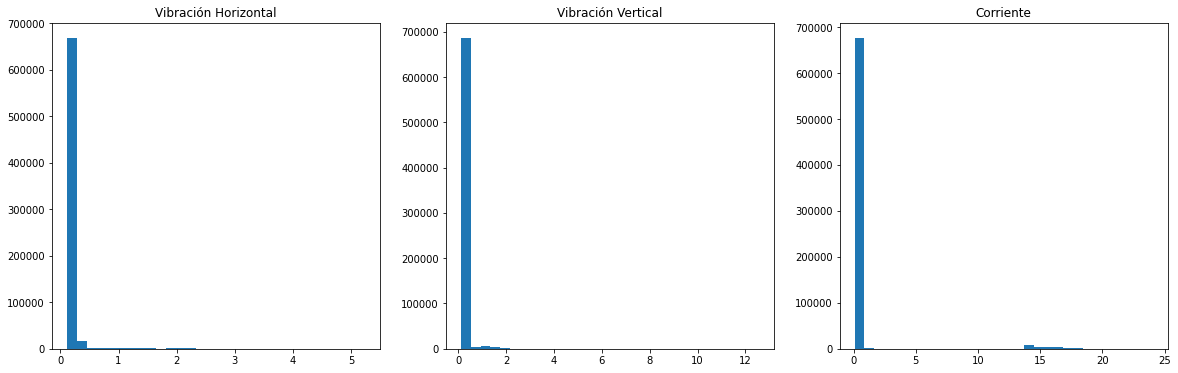

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
dfsub = Df

ax[0].hist(dfsub['H'],bins=30)
ax[1].hist(dfsub['V'],bins=30)
ax[2].hist(dfsub['C'],bins=30)


ax[0].title.set_text('Vibración Horizontal')
ax[1].title.set_text('Vibración Vertical')
ax[2].title.set_text('Corriente')

plt.show()

Vemos que la gran parte de los valores de cada una de nuestras variables están correspondidas entre los valores de 0 a 0.5 aproximadamente.

Para observarlo mejor veremos los percentiles de nuestras variables. Estos nos mostraran los valores correspondidos en cada percentil, donde vemos que los valores oscilan entre 0 y 0.5, siendo el resto de valores poco sifnificativos.

In [10]:
Df.describe(percentiles=(.1,.25,.5,.75,.9,.95,0.99))

,H,V,C
count,700598.000000,700626.000000,700619.000000
mean,0.226446,0.243882,0.594269
std,0.191817,0.165516,2.673160
min,0.110000,0.090000,0.080000
10%,0.160000,0.160000,0.090000
25%,0.180000,0.180000,0.090000
50%,0.200000,0.220000,0.100000
75%,0.230000,0.260000,0.100000
90%,0.260000,0.310000,0.100000
95%,0.280000,0.360000,0.110000


# 1.
Viendo como estan repartidos los valores de dataframe vamos a usar la variable tiempo con la variable 'C'(Corriente de la batidora) para ver un poco mejor lo datos.

En la gráfica se ve que hay distancia entre usos de la corriente al dia, lo que implica que su uso es continuado a lo largo de la semana pero no se usa todos los dias, esto si tuvieramos las horas podriamos ver a que se corresponde este uso irregular o corriente irregular que pasa por la batidora.

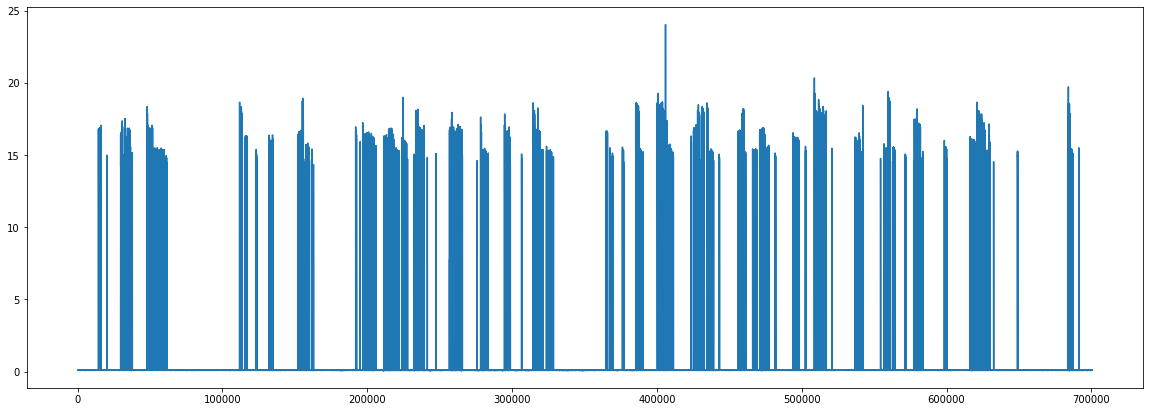

In [11]:
df=batidora
x = Df.index
y = Df.C

plt.figure(figsize=(20,7))
plt.plot(x,y)
plt.show()

Ahora vamos a hacer el mismo gráfico que el anterior pero ahora con todas las variables para ver como avanzan a lo largo del tiempo.

Los valores de la variable tiempo son bastante más demasiados altos en comparacion al del resto de columnas, por lo que las tapa, impidiendo que se puedan ver bien.

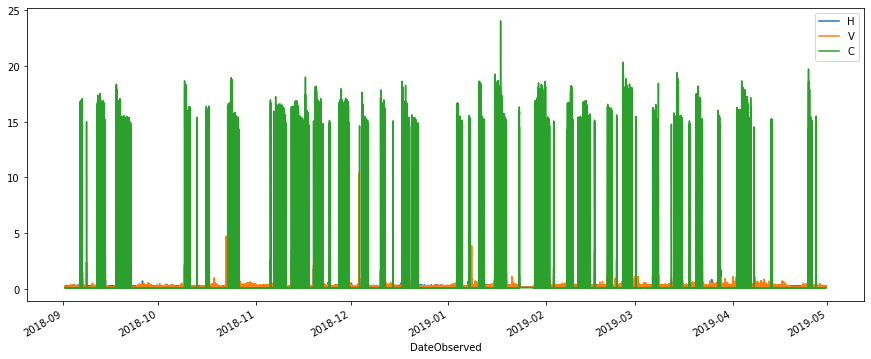

In [12]:
batidora.plot(figsize=(15,6))
plt.show()

Al ver que no hemos podido visualizar bien los datos de las columnas 'V' y 'C', son las vibraciones horizontales y verticales.

Se ve que ambas vibraciones van a la par, es decir, suben a la vez, aunque no con la misma fuerza. Los rangos de uso cuadran con los datos de la corriente, esto es obvio, pues sin corriente no va la batidora, aunque hay picos de vibraciones verticales que, a simple vista, parecen outliyers.

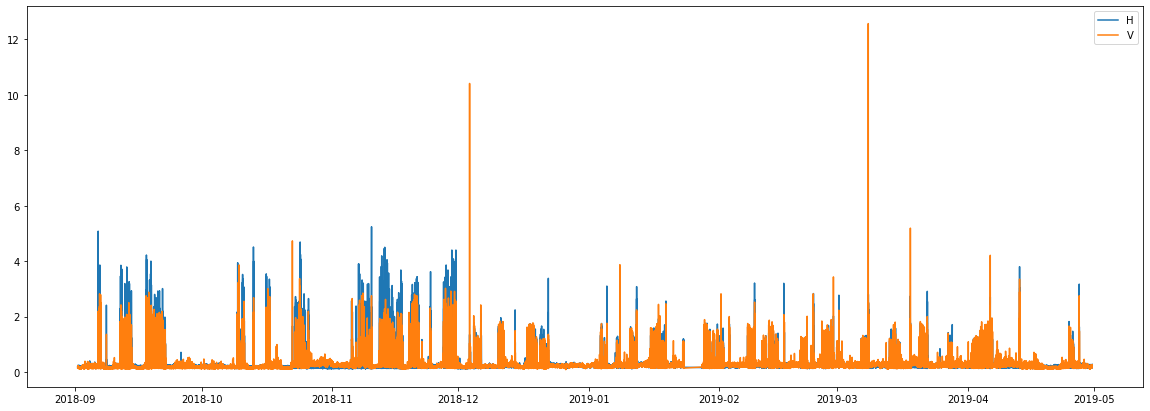

In [13]:
fig,ax = plt.subplots(figsize=(20,7))
Df = batidora
x = Df.index

ax.plot(x,df['H'],label="H")
ax.plot(x,df['V'],label="V")
ax.legend()
plt.show()

Pa ra asegurarnos de que todos los valores de verdad 'siguen un mismo rumbo', es decir, que las franjas de datos que vemos no son un error, ssino que es asi el comportamiento que toma, para ello selecciono una franja de tiempo, asi veremos el comportamiento de los datos en de forma más específica.
Se ve que si que es así como se comportan los datos, viendo que el uso de la batidora es con frecuencia, aunque su uso no es diario, e esas 2 horas que hemos seleccionado apreciamos un aumento repentino de las virbraciosnes, marcando su uso, y un repentino bajon.

Viendo esto, vamos a determinar los valores de uso de la batidora, con los percentiles de la corriente

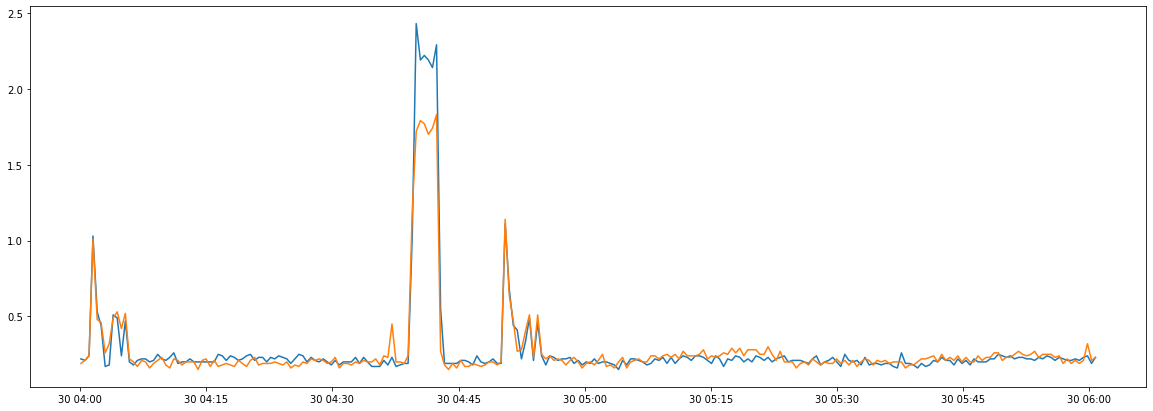

In [14]:
df7 = Df.loc['2018-11-30 04:00':'2018-11-30 06:00']

fig,ax= plt.subplots(figsize=(20,7))
x=df7.index
ax.plot(x,df7['H'])
ax.plot(x,df7['V'])
#ax.plots(x,df7['C'])
plt.show()

Observamos que el 95% de los datos estan entre como máximo en 0.11, es decir, entre 0.8 y 0.11.

In [15]:
Df.C.describe(percentiles=(.1,.25,.5,.75,.9,.95,0.99))


count    700591.000000
mean          0.594289
std           2.673212
min           0.080000
10%           0.090000
25%           0.090000
50%           0.100000
75%           0.100000
90%           0.100000
95%           0.110000
99%          15.620000
max          24.050000
Name: C, dtype: float64

Hacemos un histograma de la variabe Corriente(C) para ver más de cerca su distribucion y ver si de verdad se agrupan en valores  bajos la gran malloria de los datos.

En el segundo histograma cogemos los valores comprendidos entre 0 y 0.5, vindo que la gran parte de datos siguen ahi, en el tercer histograma vemos que cogiendo los valores comprendidos en 0.2 se ve mejor la distribución de la variable.

Observando cada histograma vemos qusi que es asi, por lo que nos tocará quitar aquellos datos que no esten comprendidos en esos valores, pues no aportaran, realmente, informacion.

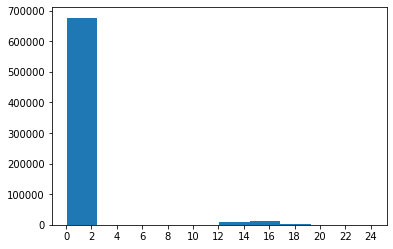

In [16]:
plt.hist(Df.C)#,bins=50)
plt.xticks(np.arange(25, step=2))
plt.show()

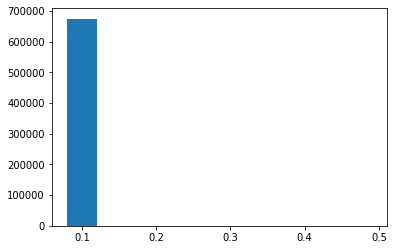

In [17]:
plt.hist(Df[Df.C<.5]['C'])
plt.show()

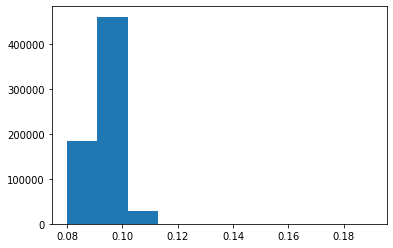

In [18]:
plt.hist(Df[Df.C<.2]['C'])
plt.show()

In [19]:
Df.C.value_counts()

0.10     461652
0.09     183551
0.11      29516
14.28       627
14.30       615
          ...  
3.67          1
18.84         1
3.59          1
7.06          1
8.77          1
Name: C, Length: 1556, dtype: int64

In [20]:
perc = Df.C.value_counts().max()/len(Df)*100
print("Un  {:.2f}% de los valores de C son 0.1".format(perc))

Un  65.89% de los valores de C son 0.1


Parece que durante la gran parte del tiempo la corriente oscilla entre 0.8 y  0.11 habiendo un gran salto entre este rango y el resto de los valores. Dicho rango debe corresponderse con el tiempo en el que la maquina esta apagada, asi que podemos deshacernos de estos datos porque no nos son relevantes. 

Filtramos aquellos datos que son mayores a 0.11, pues estos ya son más ruido que aportadores de info.

In [21]:
Df = Df[Df.C>0.11]
Df

,H,V,C
DateObserved,,,
2018-09-06 10:21:25,0.16,0.15,0.12
2018-09-06 10:37:01,5.08,2.18,16.84
2018-09-06 10:37:31,1.93,1.90,16.17
2018-09-06 10:38:01,1.94,1.83,16.18
2018-09-06 10:38:30,1.95,1.77,16.21
...,...,...,...
2019-04-27 11:18:33,0.79,0.85,14.70
2019-04-27 11:19:03,0.80,0.90,14.64
2019-04-27 11:19:31,0.55,0.77,14.48


En el plot de abajo se aprecia que los datos estan ordenados y cohesionados con el tiempo, por lo que ya afirmamos que no son errores, y que a partir de aqui ya se puede empezar a sacar la información que busquemos

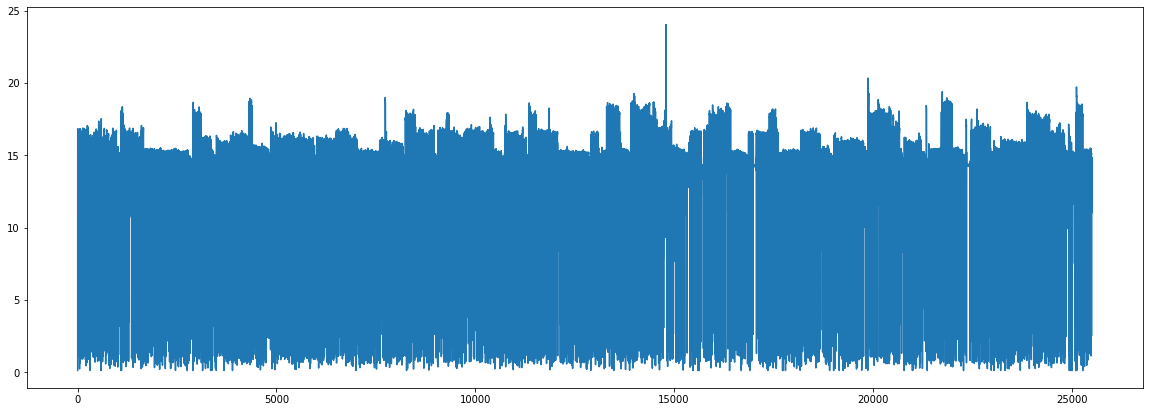

In [22]:
x = range(len(Df))
y = Df.C

plt.figure(figsize=(20,7))
plt.plot(x,y)
plt.show()

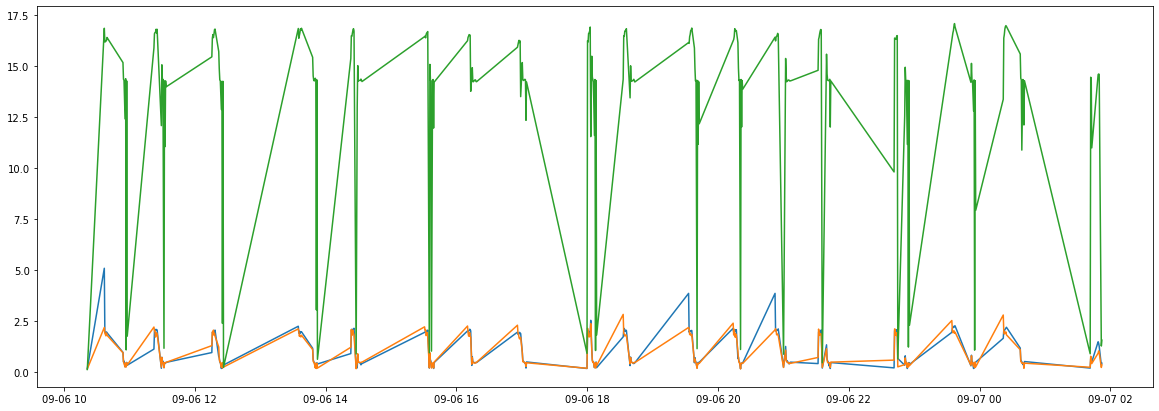

In [23]:
Dfsub = Df.loc["2018-9-6" : "2018-9-7 02"]
fig,ax = plt.subplots(figsize=(20,7))
x = Dfsub.index
ax.plot(x,Dfsub['H'])
ax.plot(x,Dfsub['V'])
ax.plot(x,Dfsub['C'])
plt.show()


Parece que entre si las variables estan correlacionadas, para saberlo con certeza lo que haremos será usar 2 métodos:

El pairplot, que nos ayudará a ver la comparación de las variables entre ellas.

El headmap que es una matriz de correlación coloreada según la correlación que muestren las variables.

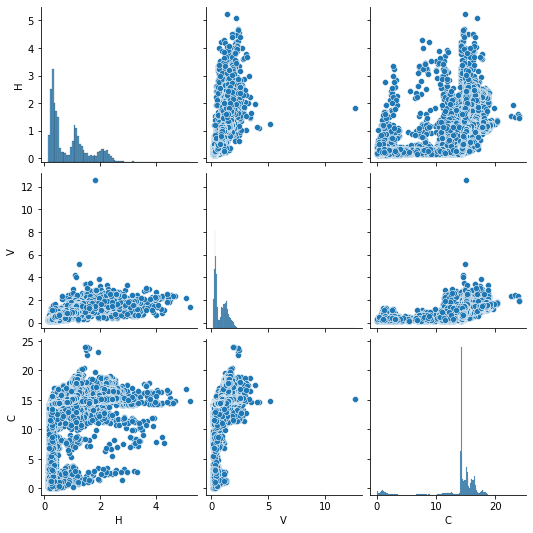

In [24]:
sns.pairplot(Df)
plt.show()

Visualmente vemos como H y C muestran una relacion apreciable , pero V si muestra alguna relacion lineal tanto con H como con C. 
Con .corr() podemos ver la correlacion entre las variables. 
En que Grado estan relacionadas linealmente: 

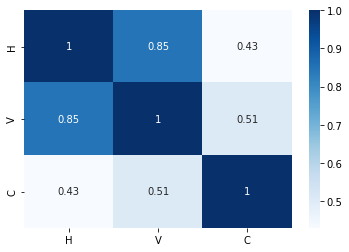

In [25]:
sns.heatmap(Df.corr(), annot=True, cmap='Blues')

Usando el metodo OLS tambien podemos estudiar la relacion entre las variables. Si por ejemplo nos fijamos en el p-valor(P>|t|), sabemos que si es muy cercano a 0 hay una alta probabildad de que ambas variables estan relacionadas. 

In [26]:
import statsmodels.api as sm 
slr_models = sm.OLS(Df['C'], Df[['H','V']])
slr_reg = slr_models.fit()

slr_reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      C   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                          4.584e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):                        0.00
Time:                        18:32:34   Log-Likelihood:                         -84721.
No. Observations:               25521   AIC:                                  1.694e+05
Df Residuals:                   25519   BIC:                                  1.695e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
H             -0.3664      0.113     -3.248      0.001      -0.587      -0.145
V             13.1216      0.130    100.959      0.000      12.867      13.376
==============================================================================
Omnibus:                    10035.333   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           316915.740
Skew:                          -1.264   Prob(JB):                         0.00
Kurtosis:                      20.077   Cond. No.                         6.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
slr_models = sm.OLS(Df['C'], Df['V'])
slr_reg = slr_models.fit()

slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      C   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                          9.164e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):                        0.00
Time:                        18:32:35   Log-Likelihood:                         -84727.
No. Observations:               25521   AIC:                                  1.695e+05
Df Residuals:                   25520   BIC:                                  1.695e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             12.7221      0.042    302.725      0.000      12.640      12.805
==============================================================================
Omnibus:                     9376.031   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249140.343
Skew:                          -1.189   Prob(JB):                         0.00
Kurtosis:                      18.121   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2.)
Vamos a empezar a escalar lo datos, para que sean más uniformes y poder aplicarlos al k-means y al isolation tree, puesto que estos precisan una estandarizcioon de los datos para funcionar correctamente

In [28]:
x = Df.values
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
x_Scaled = Scaler.fit_transform(x)

In [29]:
x_Scaled

array([[0.00587084, 0.00160772, 0.        ],
       [0.96868885, 0.164791  , 0.69870455],
       [0.35225049, 0.14228296, 0.67070623],
       ...,
       [0.08219178, 0.05144695, 0.60008358],
       [0.07632094, 0.0522508 , 0.59924781],
       [0.08023483, 0.04823151, 0.60259089]])

In [30]:
x_Scaled.shape

(25521, 3)

In [31]:
dfScaled = pd.DataFrame(x_Scaled, columns=['H','V','C'])
dfScaled.head()

,H,V,C
0,0.005871,0.001608,0.000000
1,0.968689,0.164791,0.698705
2,0.352250,0.142283,0.670706
3,0.354207,0.136656,0.671124
4,0.356164,0.131833,0.672378


Ahora realizamos un gráfico para ver si realmente los datos estandarizados están relacionados y ver un poco su distribución.
Viendo en el gráfico de abajo que realmente lo están.

Aunque, más tarde lo veremos, pero ya se va viendo que no son siempre iguales los datos y que hay unos valores raros en torno al valor 275/300.

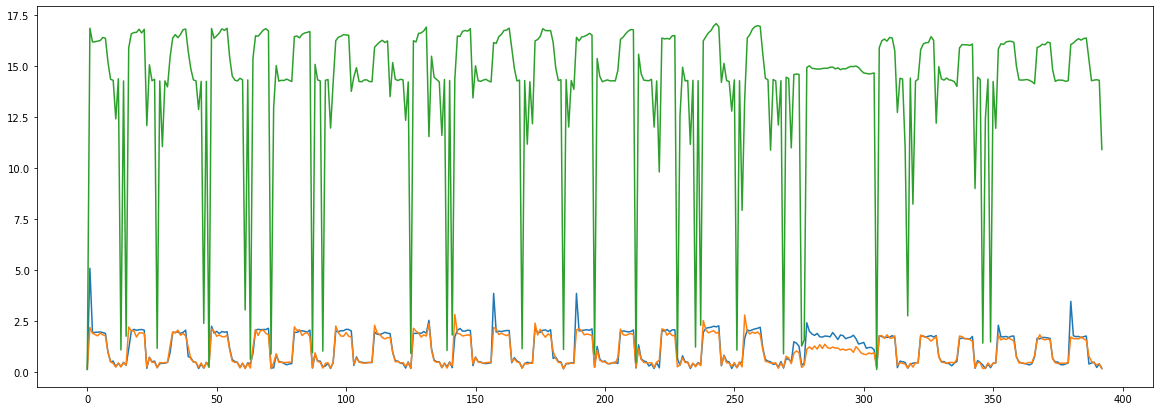

In [32]:
Dfsub = Df.iloc[:393]

fig,ax = plt.subplots(figsize=(20,7))
x = range(len(Dfsub))
ax.plot(x, Dfsub['H'])
ax.plot(x, Dfsub['V'])
ax.plot(x, Dfsub['C'])
plt.show()

Hacemos otro gráfico para verlo mejor

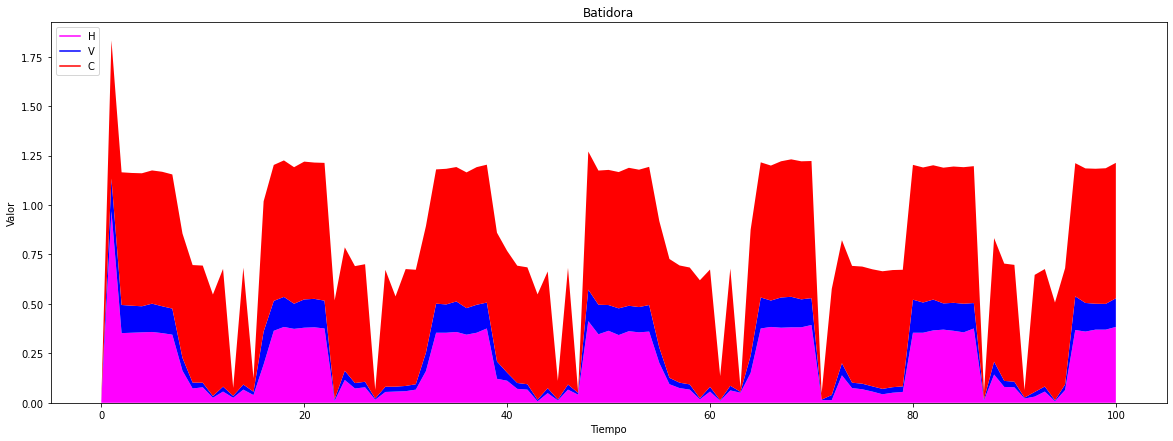

In [33]:
Dfsub = dfScaled.loc[:100]
x = Dfsub.index
fig,ax = plt.subplots(figsize=(20,7))

plt.plot([],[],color='magenta',label = 'H')
plt.plot([],[],color='blue',label = 'V')
plt.plot([],[],color='red',label = 'C')

plt.stackplot(x,Dfsub['H'],Dfsub['V'],Dfsub['C'],colors=['magenta','blue','red'])
plt.legend(loc=2)
plt.title('Batidora')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()


In [34]:
Dfsub.head()

,H,V,C
0,0.005871,0.001608,0.000000
1,0.968689,0.164791,0.698705
2,0.352250,0.142283,0.670706
3,0.354207,0.136656,0.671124
4,0.356164,0.131833,0.672378


En cuanto a lo que podemos sacar por ahora es que están altamente correlacionados, sobre todo las variables de vibraciones(H y V), que al ver que los datos van en franjas podemos afirmar que es una máquina discontinua, su uso no sigue una contnuidad lineal y posee una serie de patrones marcados que se aprecian con facilidad en los gráficos.

# Algoritmo K-means
K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html

In [35]:
from sklearn.cluster import KMeans 
#Agrupamos los datos en grupos de 15 minutos con la media
batidora15= batidora.resample('15min').mean()
batidora15['H'].fillna(batidora15['H'].min(), inplace= True)
batidora15['V'].fillna(batidora15['V'].min(), inplace= True)
batidora15['C'].fillna(batidora15['C'].min(), inplace= True)

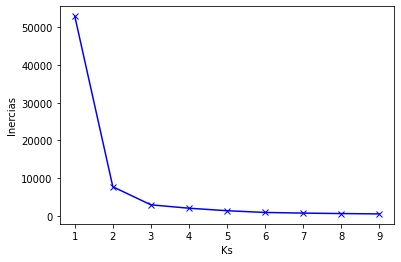

In [36]:
#Vemos la inertia con k-means para los distintos clusters
data= batidora15[['H','V','C']]
inercias=[]
for k in range(1,10):
  kmeans= KMeans(n_clusters=k)
  kmeans.fit(data)
  inercias.append(kmeans.inertia_)

plt.plot(range(1,10),inercias,'bx-')
plt.xlabel('Ks')
plt.ylabel('Inercias')
plt.show()

In [37]:
x = batidora15[['H','V','C']]
km= KMeans(n_clusters=4)
km.fit(x)
y_km= km.predict(x)
labels= km.labels_

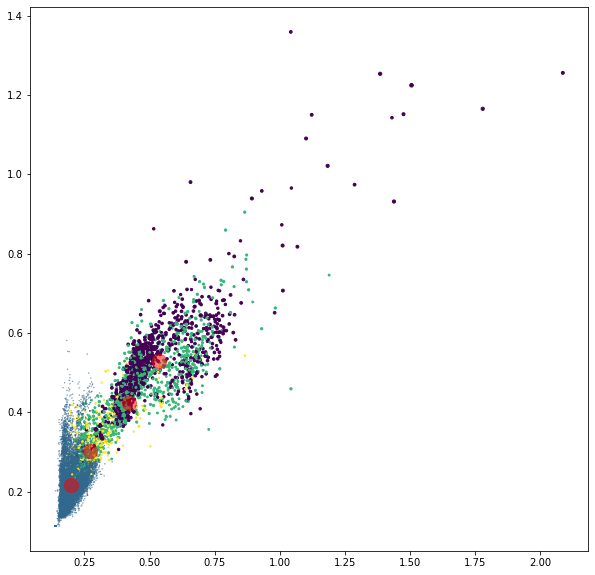

In [38]:
#Gráfico 2d
fig= plt.figure(1, figsize=(10,10))
colors=('r','g','b','y','m','c')
plt.scatter(x.iloc[:,0],x.iloc[:,1],x.iloc[:,2],c=y_km)
centers=km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='red',s=200,alpha=0.5)

La gráfica muestra los diferentes clusters, junto a los centroides, que hay, aunque esto es poco apreciado debido a que se superponen los dtos, por lo que haremos un gráfico 3d

AttributeError: ignored

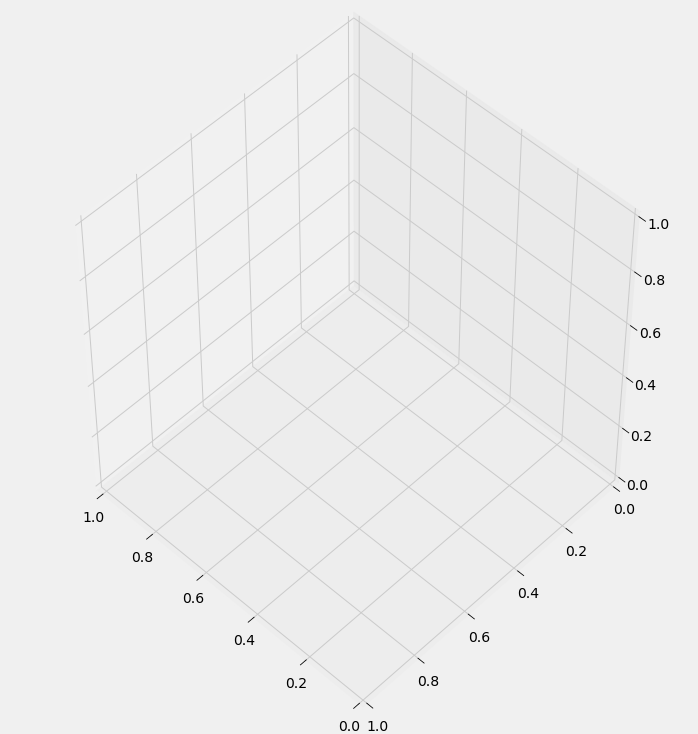

In [57]:

fig= plt.figure(1, figsize=(10,10))
ax= Axes3D(fig, rect=[0,0,0.95,1],elev=48, azim=134)
plt.scatter(x.iloc[:,0],x.iloc[:,1],x.iloc[:,2],c=labels.astype(np.float),edgecolors='k')
ax.set_xlabels('H')
ax.set_ylabels('V')
ax.set_zlabels('C')
plt.legend()

clasificamos los datos según el cluster que sea.

In [41]:
data = x[['H', 'V', 'C']]

resultado = x
kmeans=KMeans(n_clusters=4).fit(data) 
center = kmeans.cluster_centers_
resultado['cluster'] = kmeans.predict (data) 
resultado['Dateobserved'] = x.index 
resultado.index=data.index 
resultado['cluster'].value_counts()

0    20560
1     1181
2      819
3      573
Name: cluster, dtype: int64

In [42]:
outliers_fraction = 0.01

#Obtengo el mínimo del número de registros obtenido al calcular el numerr e outliers

#las distancias se ordenan de mayor a menor y se cogen los x numero de cliers 
distances = (kmeans.transform(data))

# anomaly1 contain the anomaly result of the above method Cluster (0:a malia, 1:1 
resultado[ 'distance']= kmeans.transform(data)[:,0]

resultado['anomaly1'] = (resultado['distance'] >= outliers_fraction).astype(int)
resultado.head (10)

,H,V,C,cluster,Dateobserved,distance,anomaly1
DateObserved,,,,,,,
2018-09-01 13:30:00,0.177500,0.166250,0.100000,0,2018-09-01 13:30:00,0.055430,1
2018-09-01 13:45:00,0.181667,0.169000,0.100000,0,2018-09-01 13:45:00,0.051339,1
2018-09-01 14:00:00,0.183871,0.166452,0.100323,0,2018-09-01 14:00:00,0.053042,1
2018-09-01 14:15:00,0.190323,0.170968,0.102581,0,2018-09-01 14:15:00,0.047061,1
2018-09-01 14:30:00,0.195806,0.183871,0.100000,0,2018-09-01 14:30:00,0.033550,1
2018-09-01 14:45:00,0.199667,0.175000,0.100000,0,2018-09-01 14:45:00,0.042224,1
2018-09-01 15:00:00,0.190645,0.177742,0.100000,0,2018-09-01 15:00:00,0.040423,1
2018-09-01 15:15:00,0.183548,0.173548,0.100000,0,2018-09-01 15:15:00,0.046427,1
2018-09-01 15:30:00,0.185161,0.174839,0.100000,0,2018-09-01 15:30:00,0.044680,1


Vemos las anomalias que tenemos, estan poseen el valor 0,
Apreciamos que poseemos 544 que en porcentaje serian un 2,3%, no es mucho porcentaje pero esto sera un caso de estudio del porqué se dan.

In [43]:
resultado['anomaly1'].value_counts()

1    22591
0      542
Name: anomaly1, dtype: int64

Creamos una variable llamada probabilidad creada a partir de la distancia, esta variable nos va a permitir devidir en grupos a las anomalias segun superen un cierto porcentaje, la división consiste en baja, media, alta y critica.

Vemos que la gran mayoria estan en baja, y que solo nos importan las alta o criticas, siendo estas valores pequeños en proporcion a la suma total de los datos.

In [44]:
scaler = MinMaxScaler (feature_range=(0, 1))

resultado[ "probabilty"] = scaler.fit_transform(resultado[['distance']])*100
resultado[ "level"] = 'low'
resultado["level"] = np.where(resultado['probabilty']>=50, 'medium', 'low')
resultado["level"] = np.where(resultado['probabilty']>=60, 'high' , resultado['level'])
resultado["level"] = np.where(resultado[ 'probabilty']>=75, 'critical', resultado["level"])

resultado['level'].value_counts()

low         22942
medium        149
high           30
critical       12
Name: level, dtype: int64

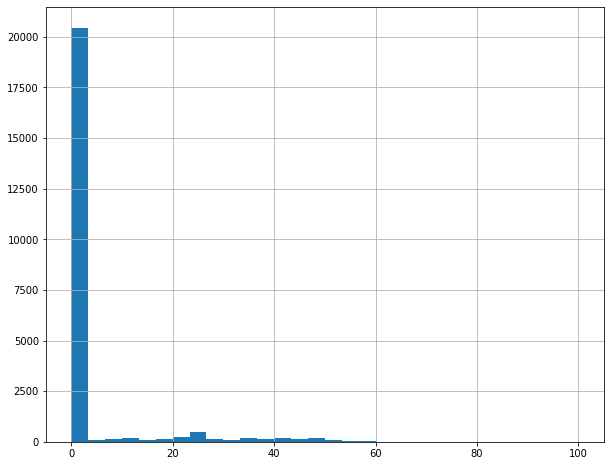

In [45]:
#Graficamos la probabilidad
resultado['probabilty'].hist(bins=30, grid=True, figsize=(10,8))

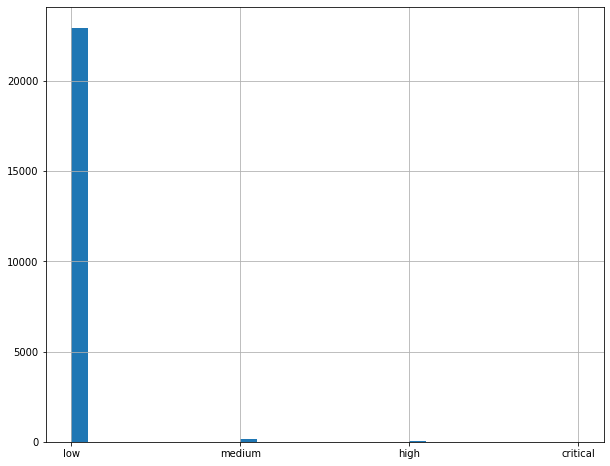

In [ ]:
resultado['level'].hist(bins=30, grid=True, figsize=(10,8))

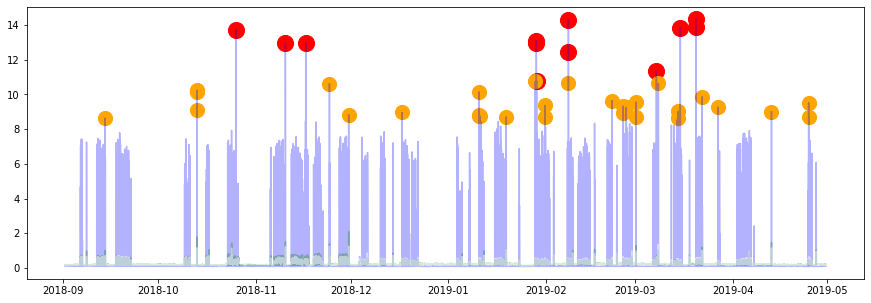

In [46]:
fig, ax= plt.subplots(figsize=(15, 5))

critical=resultado.loc[(resultado['anomaly1'] ==1) & (resultado['level']=='critical')] 
altas=resultado.loc[(resultado['anomaly1'] ==1) & (resultado[ "level"] == 'high')]
ax.scatter(critical['Dateobserved'],critical['C'], color='red', s=260)
ax.scatter(altas['Dateobserved' ],altas['C'], color='orange',s=200)

ax.plot(resultado[ 'Dateobserved'], resultado ['C'], color="blue",alpha= 0.3) 
ax.plot(resultado[ 'Dateobserved' ], resultado['H'], color="green",alpha=0.3)
ax.plot(resultado[ 'Dateobserved'], resultado['V'], color="white",alpha=0.5)

plt.show()

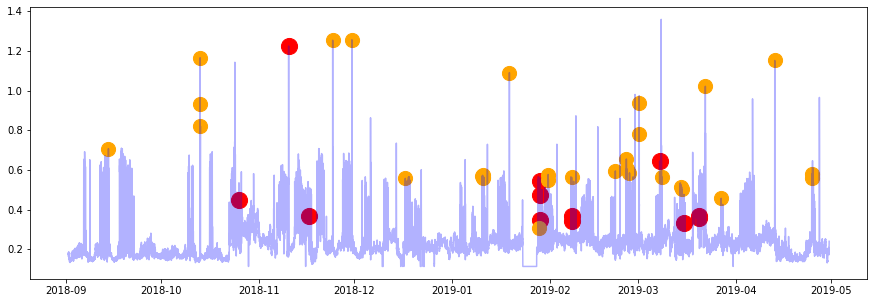

In [47]:
fig, ax= plt.subplots(figsize=(15, 5))

critical=resultado.loc[(resultado['anomaly1'] ==1) & (resultado['level']=='critical')] 
altas=resultado.loc[(resultado['anomaly1'] ==1) & (resultado[ "level"] == 'high')]
ax.scatter(critical['Dateobserved'],critical['V'], color='red', s=260)
ax.scatter(altas['Dateobserved' ],altas['V'], color='orange',s=200)

ax.plot(resultado[ 'Dateobserved'], resultado ['V'], color="blue",alpha= 0.3) 


In [49]:
#Enumeramos los valores importantes según el nivel de probabilidad
importantes = resultado.loc[(resultado['anomaly1'] ==1) & (resultado['probabilty']>=60)]

importantes.head(20)

,H,V,C,cluster,Dateobserved,distance,anomaly1,probabilty,level
DateObserved,,,,,,,,,
2018-09-14 07:00:00,1.012258,0.707097,8.626774,2,2018-09-14 07:00:00,8.577205,1,60.328249,high
2018-10-13 07:30:00,1.780000,1.165484,10.243226,2,2018-10-13 07:30:00,10.307149,1,72.497763,high
2018-10-13 08:30:00,1.439000,0.931667,10.160000,2,2018-10-13 08:30:00,10.159021,1,71.455739,high
2018-10-13 10:00:00,1.011290,0.820645,9.100000,2,2018-10-13 10:00:00,9.054448,1,63.685475,high
2018-10-25 18:00:00,0.525000,0.446000,13.732333,2,2018-10-25 18:00:00,13.635895,1,95.914263,critical
2018-11-10 08:30:00,1.506452,1.224839,12.930645,2,2018-11-10 08:30:00,12.934132,1,90.977624,critical
2018-11-16 21:30:00,0.393437,0.369375,12.943437,2,2018-11-16 21:30:00,12.843557,1,90.340461,critical
2018-11-24 07:15:00,1.385938,1.253750,10.612813,2,2018-11-24 07:15:00,10.628008,1,74.754887,high
2018-11-30 09:30:00,2.087742,1.256129,8.825484,2,2018-11-30 09:30:00,8.985570,1,63.200945,high


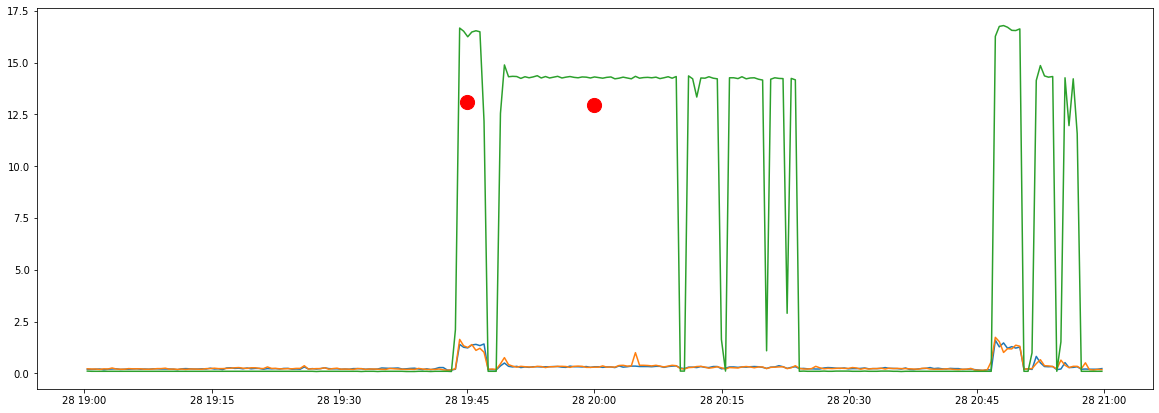

In [50]:
dfsub=batidora.loc['2019-01-28 19':'2019-01-28 20']

x = dfsub.index

anomalias= importantes.loc [ '2019-01-28 19':'2019-01-28 20'] 
fig, ax= plt.subplots(figsize=(20,7)) 
ax.scatter(anomalias['Dateobserved' ], anomalias['C'], color='red',s=200 )
ax.plot(x,dfsub['H'])
ax.plot(x,dfsub ['V'])
ax.plot(x, dfsub['C'])

plt.show()

# Isolation Forest
es una método no supervisado para identificar anomalías (outliers) cuando los datos no están etiquetados, es decir, no se conoce la clasificación real (anomalía - no anomalía) de las observaciones.

Su funcionamiento está inspirado en el algoritmo de clasificación y regresión Random Forest.

https://www.cienciadedatos.net/documentos/66_deteccion_anomalias_isolationforest.html

In [60]:
#Take useful feature and standardize them
outliers_fraction=0.01
data = batidora15[['H', 'V', 'C']]

#train isolation forest
model = IsolationForest(contamination=outliers_fraction, n_estimators=1000, max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=1)
model.fit(data)
iso_predictions = model.predict(data)
iso_score = model.score_samples(data)

batidora15['anomaly2'] = iso_predictions.tolist()
batidora15['distance2'] = iso_score.tolist()
batidora15['anomaly2'] = batidora15['anomaly2'].map({1: 0, -1:1})

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Aqui vemos que nos da muchas menos anomalias que en el K-means, esto se ve debido a que es más preciso el Isolation Tree por lo que vemos que la probabilidad de anomalia es cada vez menos.

In [61]:
batidora15['anomaly2'].value_counts()

0    22901
1      232
Name: anomaly2, dtype: int64

Pese a que tenemos menos anomalias en este caso, poseemos un mayor número de anomalias con alta probabilidad de suceso, por lo que, si fuera en la vida real, estudiaria en que máquinas se darán para contrarrestarlo ver la forma de minimizar daños.

In [62]:
batidora15['probabilty2'] = batidora15['distance2'].abs()*100
batidora15['level2'] = 'low'
batidora15['level2'] = np.where((batidora15['probabilty2']>=50) & (batidora15['anomaly2']==1), 'medium', 'low')
batidora15['level2'] = np.where((batidora15['probabilty2']>=60) & (batidora15['anomaly2']==1), 'high', batidora15['level2'])
batidora15['level2'] = np.where((batidora15['probabilty2']>=75) & (batidora15['anomaly2']==1), 'critical', batidora15['level2'])
batidora15['level2'].value_counts()

low         22901
high          185
critical       47
Name: level2, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


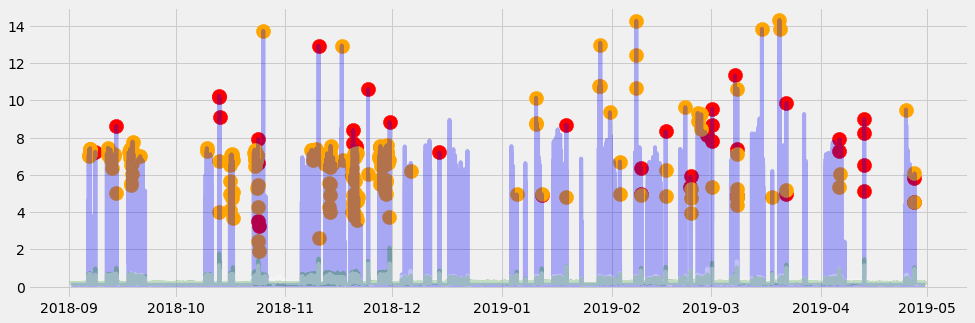

In [63]:
fig, ax = plt.subplots(figsize=(15,5))
resultado = batidora15[['H', 'V', 'C', 'anomaly2', 'level2']]
resultado['DateObserved'] = batidora15.index
criticas = resultado.loc[(resultado['anomaly2']==1)&(resultado['level2']=='critical')]
altas = resultado.loc[(resultado['anomaly2']==1) & (resultado['level2']=='high')]
ax.scatter(criticas['DateObserved'], criticas['C'], color='red', s=200)
ax.scatter(altas['DateObserved'], altas['C'], color='orange', s=200)
ax.plot(resultado['DateObserved'], resultado['C'], color='blue', alpha=0.3)
ax.plot(resultado['DateObserved'], resultado['H'], color='green', alpha=0.3)
ax.plot(resultado['DateObserved'], resultado['V'], color='white', alpha=0.3)
plt.show()

En ambos gráficos vemos las anomalias de cada variable, pero haciendo zoom vemos que es muy frecuente que las anomalias pasen de forma seguida, esto indicaria que dichas anomalias están enlazadas, y como hipótesis, puede ser que unas causen otras. 
Si fuera el dueño y observo esto buscaria hacer un estudio de las máquinas y del porcentaje de anomalias de estas, tambien en el caso de que viera una anomalia pararia dicha máquina ya que en la gran parte de casos, cuando ocurre una anomalia en los dias siguientes ocurren más.

In [64]:
import plotly.graph_objects as go 
fig = go.Figure()
fig.add_trace(go.Scatter(x=batidora15.index, y=batidora15['H'],
                         mode='lines',
                         name='lines'))
fig.add_trace(go.Scatter(x=batidora15.index, y=batidora15['V'],
                         mode='lines',
                         name='lines'))
fig.add_trace(go.Scatter(x=criticas.index, y=criticas['H'],
                         mode='markers',
                         name='markers'))
fig.show()